<h1> Weightlifting Dataset </h1>
Based on data from Summer and Winter Olympics, 1896-2022. 
Handled by Nicholas Stach.

### Data Quirks:
1) Weight classes have changed numerous times over the course of Olympic game history, and are thus not uniform!
2) There was no weightlifting event for the 2022 Beijing Games. Weightlifting is a summer sport and the most recent game recorded was a winter game.

In [97]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Import data & clean
# From: https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018/
filePath = './Raw Data/Summer-Winter Olympics/'
fileName = 'olympic_medals.csv'
colHeads = ["discipline_title", "oly_game", "event_title", "event_gender", "medal_type", "participant_type", 
            "particpant_title", "athlete_url", "athlete_full_name", "country_name", "country_code_2_letter", "country_code"]        # column names
allSports = pd.read_csv(filePath+fileName, skiprows=1, names=colHeads)                                                              # read in all data (every sport)

# Focus exclusively on weightlifting
weightDF = allSports[allSports['discipline_title'] == 'Weightlifting']                                                              # all weightlifting medalists, by game, 1896-2022

# Trim data of labels that are redundant for our purposes
weightDF = weightDF.drop(columns=["discipline_title", "participant_type", "particpant_title", "athlete_url", 
                                  "country_code_2_letter"], axis=1)

# Add explicit year column (to help in data analysis later)
years = pd.Series(weightDF["oly_game"].str[-4:], name='year', dtype='int')                                                          # get year for each row (last four characters of 'oly_game')
weightDF = pd.concat([weightDF, years], axis=1)                                                                                     # concatenate, column-wise
display(weightDF)

,oly_game,event_title,event_gender,medal_type,athlete_full_name,country_name,country_code,year
1049,tokyo-2020,Men's 61kg,Men,SILVER,Eko Yuli IRAWAN,Indonesia,INA,2020
1050,tokyo-2020,Men's 61kg,Men,GOLD,Fabin LI,People's Republic of China,CHN,2020
1051,tokyo-2020,Men's 61kg,Men,BRONZE,Igor SON,Kazakhstan,KAZ,2020
1052,tokyo-2020,Women's 55kg,Women,SILVER,Qiuyun LIAO,People's Republic of China,CHN,2020
1053,tokyo-2020,Women's 55kg,Women,BRONZE,Zulfiya CHINSHANLO,Kazakhstan,KAZ,2020
...,...,...,...,...,...,...,...,...
21692,athens-1896,heavyweight - one hand lift men,Men,SILVER,Viggo JENSEN,Denmark,DEN,1896
21693,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Alexandros Nikolopoulos,Greece,GRE,1896
21694,athens-1896,heavyweight - two hand lift men,Men,GOLD,Viggo JENSEN,Denmark,DEN,1896
21695,athens-1896,heavyweight - two hand lift men,Men,SILVER,Launceston ELLIOT,Great Britain,GBR,1896


Men:  1896
Women:  2000


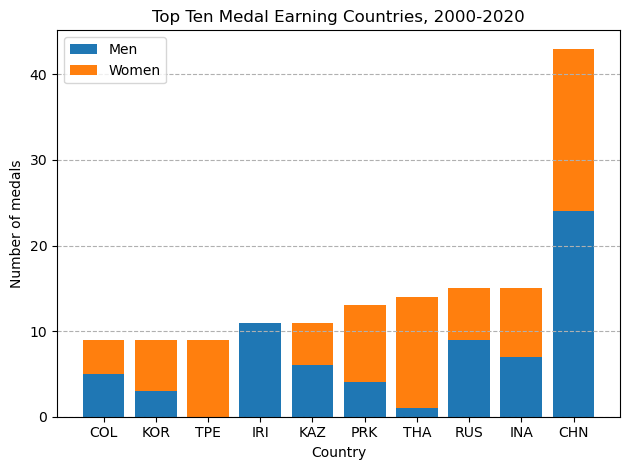

['Colombia', 'Republic of Korea', 'Chinese Taipei', 'Islamic Republic of Iran', 'Kazakhstan', "Democratic People's Republic of Korea", 'Thailand', 'Russian Federation', 'Indonesia', "People's Republic of China"]


In [98]:
# HW8, Question 3 ----------------------------------------------------------------------

# How far back do medals go per gender?
print("Men: ", weightDF[weightDF.event_gender == "Men"].year.min())
print("Women: ", weightDF[weightDF.event_gender == "Women"].year.min())

# We notice that men have weightlifting medals going back to 1896, but 
# women only have medals going back to 2000 (when Women's Olympic lifting was introduced).


# Look at 21st Century lifting medals, and plot top 10 medal earning countries (specify event gender per medal won)
twenty1stDF = weightDF[weightDF.year >= 2000]                                   # data from 2000 to 2020
countries, counts = np.unique(twenty1stDF.country_code, return_counts=True)
countIndices = np.argsort(counts)                                               # sort counts in ascending order
topResults = countIndices[-10:]                                                 # get indices of top 10 counts


# Get data by gender, for each country
topResultsNames = []                                                # hold country names for top results
topWomen = np.empty(len(topResults))                                # hold results for women, per country
topMen = np.empty(len(topResults))                                  # hold results for men, per country

for i in range(len(topResults)):  
    cName = countries[topResults[i]]                                          
    topResultsNames.append(cName)                                                       # store names of countries in top results
    topWomen[i] = twenty1stDF[ (twenty1stDF.country_code == cName)
                              & (twenty1stDF.event_gender == "Women")].shape[0]         # get number of women's medals for this country, 2000-2020
    topMen[i] = twenty1stDF[ (twenty1stDF.country_code == cName)
                              & (twenty1stDF.event_gender == "Men")].shape[0]           # get number of men's medals for this country, 2000-2020

# Plot data as stacked bar chart
bottoms = np.zeros(len(topResults))                                                  # bottoms for stacked bar plot
plt.bar(topResultsNames, topMen, label="Men", bottom=bottoms, color='tab:blue')
bottoms += topMen                                                                    # adjust bottoms to begin where men's data ended
plt.bar(topResultsNames, topWomen, label="Women", bottom=bottoms, color='tab:orange')

# Graph settings
plt.title("Top Ten Medal Earning Countries, 2000-2020")
plt.xlabel("Country")
plt.ylabel("Number of medals")
plt.grid(axis='y', linestyle='dashed')
plt.tight_layout()
plt.legend()
plt.show()


# Get full name for each country
names = []
for i in range(len(topResults)):  
    code = countries[topResults[i]]
    name = twenty1stDF[twenty1stDF.country_code == code].country_name.values[0]
    names.append(name)       
print(names)

### Summary

    Women only have Olympic weightlifting medals starting in 2000 because this is when Women's Olympic Weightlifting was first introduced, where as men had lifting events since 1896. From the top 10 medal earning countries (Bronze, Silver, and Gold) of 2000 through 2020, only one country was able to go above 20 medals, this country being China, who has a roughly even split of medals. Russia, India, and Colombia also show near even splits across genders for medals earned. However, Taiwan and Iran have medals only for women and men respectively.